# Load and plot results from control script runs

In [1]:
from importlib import reload

import matplotlib.pyplot as plt
import pickle
import numpy as np

from adaptive_time import plot_utils
from adaptive_time import utils

from pprint import pprint

plot_utils = reload(plot_utils)
utils = reload(utils)

In [2]:
utils.set_directory_in_project()

Changed working directory to /Users/szepi1991/Code/adaptive_time


'/Users/szepi1991/Code/adaptive_time'

## Load and Explore Data

In [3]:
# A run where adaptive does great than collapses.
# res_file_path = "exp_results/old/tradeoff_results_20240227-113757.pkl"

# Longer run with more seeds, changed params.
res_file_path = "exp_results/old/tradeoff_results_20240228-221208.pkl"

with open(res_file_path, "rb") as f:
    loaded = pickle.load(f)
    if "results" in loaded:
        results = loaded["results"]
        print("The config for these results was: ")
        pprint(loaded["config"])
    else:
        results = loaded
        print("There was no config stored with the results.")

The config for these results was: 
{'budget': 10000,
 'budget_type': <BudgetType.UPDATES: 2>,
 'do_weighing': True,
 'epsilon': 0.05,
 'gamma': 0.99999,
 'max_env_steps': None,
 'num_runs': 8,
 'policy_to_evaluate': None,
 'save_limit': None,
 'seed': 13,
 'tau': 0.02,
 'termination_prob': 0.002,
 'weights_to_evaluate': None}


In [4]:
# Method names:
results.keys()

dict_keys(['q0_10', 'q0_5', 'q0_1', 'u5', 'u10', 'u20'])

In [5]:
# Per run (seed) data:
pprint(list(
    results[next(iter(results.keys()))][0].keys()))

['total_return',
 'total_pivots',
 'total_interactions',
 'num_episode',
 'returns_per_episode_q',
 'predicted_returns_q',
 'returns_per_episode_v',
 'predicted_returns_v']


In [6]:
print("Numbers of episodes:")
max_episodes = 0
for name, runs_data in results.items():
    num_episodes = [len(run["returns_per_episode_v"]) for run in runs_data]
    max_episodes = max(max_episodes, max(num_episodes))
    print(f" * {name}: {num_episodes}")

Numbers of episodes:
 * q0_10: [3067, 1347, 1271, 1797, 1748, 2657, 3528, 1437]
 * q0_5: [897, 1870, 767, 1122, 1000, 692, 850, 1069]
 * q0_1: [357, 321, 181, 486, 576, 315, 303, 112]
 * u5: [471, 387, 246, 260, 452, 301, 1004, 419]
 * u10: [927, 1371, 760, 775, 2034, 964, 1495, 953]
 * u20: [9574, 9912, 3830, 1235, 9997, 8618, 9301, 6200]


### Plotting Code -- INSTRUCTIONS

By default we load the plotting code from `plot_utils.py`, but feel
free to overwrite these below.

In [7]:
plot_stuff = plot_utils.plot_stuff
default_plot_per_run_from_dict = plot_utils.default_plot_per_run_from_dict


# def plot_stuff(tuples_of_x_y_labels_kwargs, title, show):

#     ax = plt.gca()
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)

#     for x, y, label, kwargs in tuples_of_x_y_labels_kwargs:
#         plt.plot(x, y, label=label, **kwargs)

#     plt.legend()

#     if title is not None:
#         plt.title(title)

#     if show:
#         plt.show()
#     return ax


# def default_plot_per_run_from_dict(
#         results, x_label, y_label, title=None, runs=None, show=True):
#     """Plot y vs x, potentially for a subset of the runs."""
#     if runs is None:
#         num_rums = len(next(iter(results.values())))
#         runs = list(range(num_rums))
    
#     if title is None:
#         title = f"{y_label} vs {x_label}"

#     colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
#     if len(results) > len(colors):
#         # NOTE this could just be a warning; feel free to change.
#         raise ValueError("Too many results to plot.")

#     tuples_of_x_y_labels_kwargs = []
#     for i, (name, all_seeds_data) in enumerate(results.items()):
#         for run_idx in runs:
#             seed_data = all_seeds_data[run_idx]
#             tuples_of_x_y_labels_kwargs.append((
#                 seed_data[x_label],
#                 seed_data[y_label],
#                 name if run_idx==0 else None,
#                 # {"color": colors[i], "marker": ".",
#                 #  "linestyle": "None", "markersize": 5,
#                 #  "alpha": 0.8}
#                 {"color": colors[i], "marker": ".",
#                  "linestyle": "-", "markersize": 5,
#                  "alpha": 0.8}
#             ))

#     ax = plot_stuff(tuples_of_x_y_labels_kwargs, title, False)
#     ax.set_ylabel(y_label, rotation=90, labelpad=5)

#     ax.set_xlabel(x_label)
#     if show:
#         plt.show()
#     return ax


## Plots of all Individual Runs

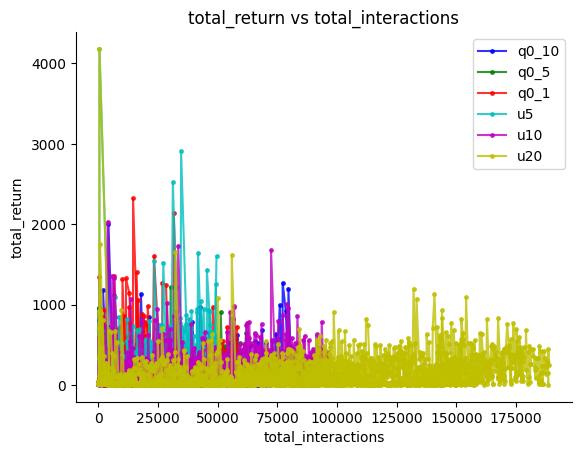

In [8]:
ax = default_plot_per_run_from_dict(
    results, x_label="total_interactions", y_label="total_return",
    title=None, runs=None, show=True,
)

# ax.set_yscale('log')



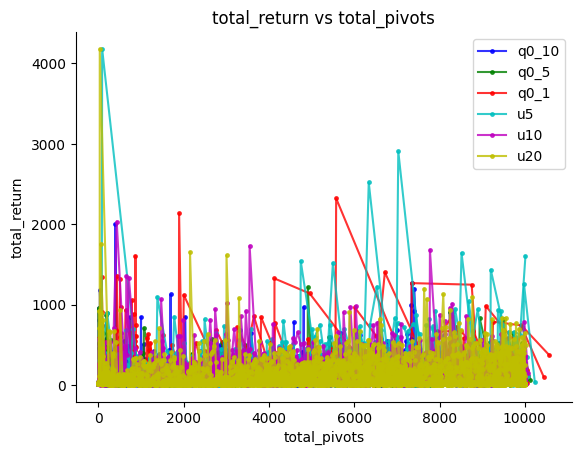

In [9]:
ax = default_plot_per_run_from_dict(
    results, x_label="total_pivots", y_label="total_return",
    title=None, runs=None, show=True,
)


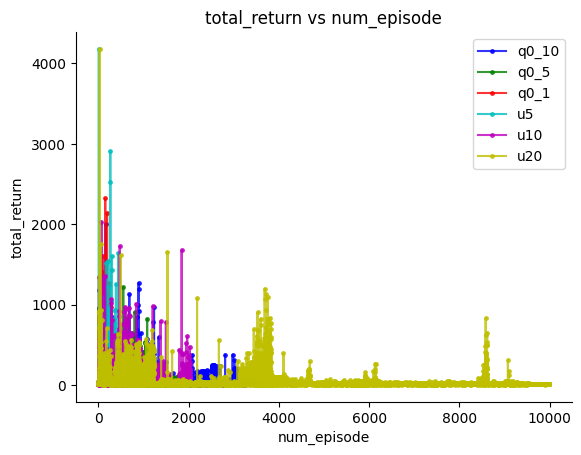

In [10]:
ax = default_plot_per_run_from_dict(
    results, x_label="num_episode", y_label="total_return",
    title=None, runs=None, show=True,
)



## Plots of Average Performance

### Return vs pivots (updates)

In [11]:
p_rets_data = plot_utils.process_across_runs(
        results, "total_pivots", "total_return", right=np.nan)

# p_rets_data.stderrs["q0_5"]

/Users/szepi1991/Code/adaptive_time/code/adaptive_time/plot_utils.py:64: RuntimeWarning: Mean of empty slice
  all_y_means[name] = np.nanmean(res, axis=0)
/Users/szepi1991/Code/adaptive_time/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


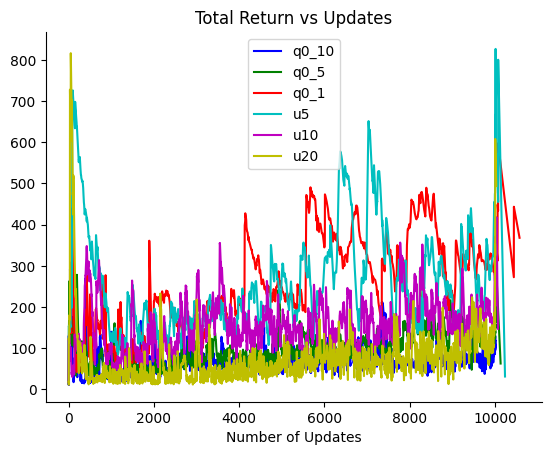

In [12]:

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

tuples_of_x_y_labels_kwargs = []
for i, (name, mean_returns) in enumerate(p_rets_data.means.items()):
    tuples_of_x_y_labels_kwargs.append((
        p_rets_data.xs, mean_returns, name,
        # {"color": colors[i], "marker": ".", "linestyle": "None", "markersize": 5, "alpha": 0.8}
        {"color": colors[i], "marker": "", "linestyle": "-"}
    ))


ax = plot_stuff(tuples_of_x_y_labels_kwargs,
               "Total Return vs Updates", False)
# ax.set_yscale('log')
# ax.set_xlim(0, 400)
ax.set_xlabel('Number of Updates')
plt.show()


### Returns vs Episodes

In [13]:
e_rets_data = plot_utils.process_across_runs(
        results, "num_episode", "total_return", right=np.nan)

# all_pred_stderrs["q0_5"]

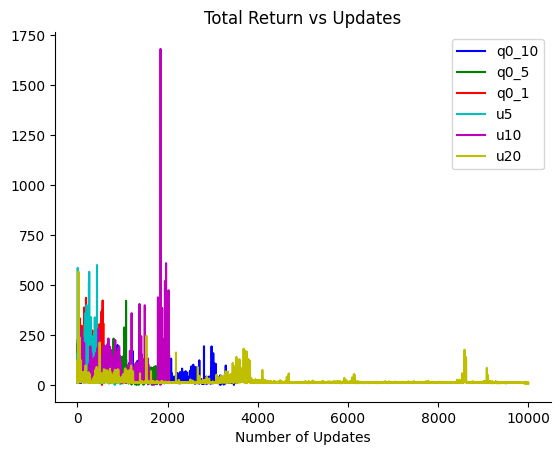

In [14]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

tuples_of_x_y_labels_kwargs = []
for i, (name, mean_returns) in enumerate(e_rets_data.means.items()):
    tuples_of_x_y_labels_kwargs.append((
        e_rets_data.xs, mean_returns, name,
        # {"color": colors[i], "marker": ".", "linestyle": "None", "markersize": 5, "alpha": 0.8}
        {"color": colors[i], "marker": "", "linestyle": "-"}
    ))


ax = plot_stuff(tuples_of_x_y_labels_kwargs,
               "Total Return vs Updates", False)
# ax.set_yscale('log')
# ax.set_xlim(0, 400)
ax.set_xlabel('Number of Updates')
plt.show()
